In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [2]:
df = pd.read_csv('datasets/dados_mes_ano.csv', sep=",")
df.head()

,data,preco,ano,mes
0,2024-09-30,72.35,2024,9
1,2024-09-27,71.63,2024,9
2,2024-09-26,73.06,2024,9
3,2024-09-25,75.40,2024,9
4,2024-09-24,75.29,2024,9


In [4]:
df_new = df[['data', 'preco']]
df_new.head()

,data,preco
0,2024-09-30,72.35
1,2024-09-27,71.63
2,2024-09-26,73.06
3,2024-09-25,75.40
4,2024-09-24,75.29


In [5]:
df_data = df_new.set_index('data')

In [51]:
scaler = MinMaxScaler()
df_data['preco'] = scaler.fit_transform(df_data['preco'].values.reshape(-1, 1))

In [ ]:
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [55]:
SEQ_LENGTH = 30
X, y = create_sequences(df_data['preco'].values, SEQ_LENGTH)

In [56]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [57]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [58]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))
model.add(LSTM(50))
model.add(Dense(1))

c:\Users\rpjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 30, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0315 - val_loss: 3.5356e-04
Epoch 2/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0097 - val_loss: 2.7398e-04
Epoch 3/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0088 - val_loss: 1.6870e-04
Epoch 4/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0065 - val_loss: 8.2877e-05
Epoch 5/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0041 - val_loss: 5.3340e-05
Epoch 6/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0024 - val_loss: 4.9244e-05
Epoch 7/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0017 - val_loss: 4.9225e-05
Epoch 8/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0013 - val_loss: 5.2674e-05
Epoch 9/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0012 - val_loss: 6.0710e-05
Epoch 10/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0011 - val_loss: 7.2681e-05
Epoch 11/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0011 - val_loss: 8.6926e-

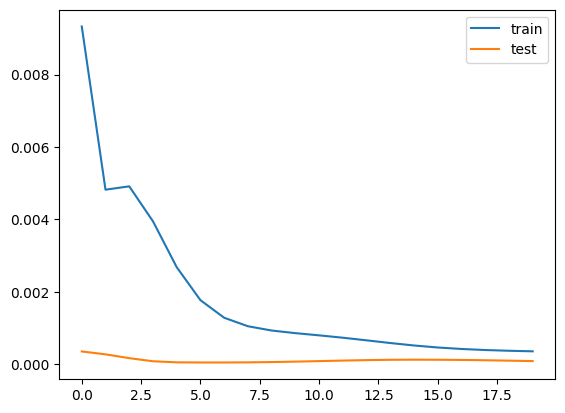

In [60]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


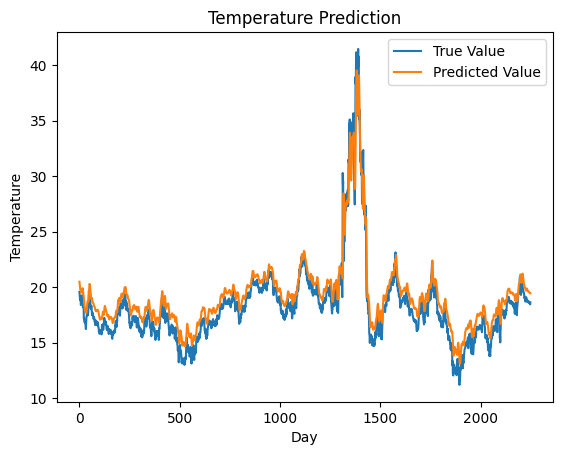

In [62]:
# Make predictions
predicted = model.predict(X_test)

# Invert the scaling
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.plot(y_test, label='True Value')
plt.plot(predicted, label='Predicted Value')
plt.title('Temperature Prediction')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error 
rmse = np.sqrt(mean_squared_error(y_test, predicted))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 1.2595309216518713
